### Text

Example from [nltk.org](https://www.nltk.org/) homepage. Remember to study [Part of Speech Tagging](http://www.nltk.org/book/ch05.html).

In [1]:
import nltk
from nltk.tokenize.treebank import TreebankWordDetokenizer

In [2]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /home/vncsna/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/vncsna/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [3]:
def anonymize_proper_noun(sentence):
    tokens = nltk.word_tokenize(sentence)
    tagged = nltk.pos_tag(tokens)
    new_tokens = [
        word if pos != 'NNP' else '<NNP>'
        for word, pos in tagged
    ]
    detokenizer = TreebankWordDetokenizer()
    return detokenizer.detokenize(new_tokens)

In [4]:
sentence = """At eight o'clock on Thursday morning 
              Arthur didn't feel very good."""
anonymize_proper_noun(sentence)

"At eight o'clock on <NNP> morning <NNP> didn't feel very good."

### Image

Example from [Adarsh Menon](https://towardsdatascience.com/face-detection-in-2-minutes-using-opencv-python-90f89d7c0f81) with [Adrian Rosebrock](https://www.pyimagesearch.com/2020/04/06/blur-and-anonymize-faces-with-opencv-and-python/).

In [5]:
import cv2
import numpy as np
from PIL import Image

In [6]:
CASCADE_CLASSIFIER = cv2.CascadeClassifier(
    './haarcascade_frontalface_default.xml')

In [7]:
def blur(img, factor=3.0):
    # auto determine the size of blurring kernel
    (h, w) = image.shape[:2]
    kW = int(w / factor)
    kH = int(h / factor)
    
    # ensure that width and height are odd
    kW = kW if kW % 2 != 0 else kW - 1
    kH = kH if kH % 2 != 0 else kH - 1
    
    # apply a gaussian blue to image
    return cv2.GaussianBlur(img, (kW, kH), 0)

def cover(img):
    return np.zeros_like(img)

def pixelate(img):
    height, width = img.shape[:2]
    
    # downscale image
    output = cv2.resize(
        img, (6, 6), interpolation=cv2.INTER_LINEAR)
    
    # upscale image
    output = cv2.resize(
        output, (width, height), interpolation=cv2.INTER_NEAREST)
    
    return output

def visualize(img):
    return Image.fromarray(img, mode='RGB')

def anonymize_faces(img, filtr):
    # transform color to gray
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # detect region of interest with
    # a haar cascade feature classifier
    faces = CASCADE_CLASSIFIER.detectMultiScale(gray, 1.1, 4)
    
    # loop faces and apply filter
    for (x0, y0, width, height) in faces:
        face = img[x0:x0 + width, y0:y0 + height, :]
        img[x0:x0 + width, y0:y0 + height, :] = filtr(face)
    
    # transform color space to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    return img

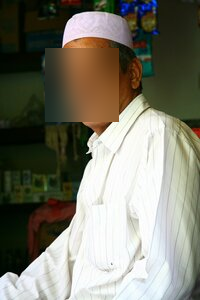

In [8]:
image = cv2.imread('./face1.jpg')
visualize(anonymize_faces(image, blur))

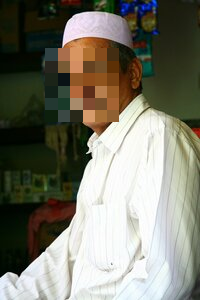

In [9]:
image = cv2.imread('./face1.jpg')
visualize(anonymize_faces(image, pixelate))

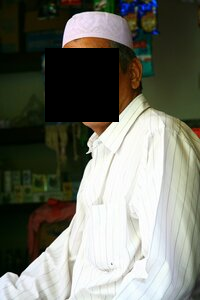

In [10]:
image = cv2.imread('./face1.jpg')
visualize(anonymize_faces(image, cover))